# **Extracting Stock Data Using a Python Library**
A company's stock share is a piece of the company more precisely:

**A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]**

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the yfinance library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.

# **Table of Contents**
- Using yfinance to Extract Stock Info
- Using yfinance to Extract Historical Share Price Data
- Using yfinance to Extract Historical Dividends Data
- Exercise
- 
Estimated Time Needed: 30 min

In [1]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 3.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 6.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-macosx_10_9_x86_64.whl size=271084 sha256=19c783a3aa5f6bf2e36a7af70a525c4f930085c2b2be5252b4c2cbeab5437c63
  Stored in directory: /Users/purushottamphuyal/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [2]:
import yfinance as yf
import pandas as pd

Using the yfinance Library to Extract Stock Data


Using the Ticker module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.



In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.



In [10]:
!wget --help

GNU Wget 1.25.0, a non-interactive network retriever.
Usage: wget [OPTION]... [URL]...

Mandatory arguments to long options are mandatory for short options too.

Startup:
  -V,  --version                   display the version of Wget and exit
  -h,  --help                      print this help
  -b,  --background                go to background after startup
  -e,  --execute=COMMAND           execute a `.wgetrc'-style command

Logging and input file:
  -o,  --output-file=FILE          log messages to FILE
  -a,  --append-output=FILE        append messages to FILE
  -d,  --debug                     print lots of debugging information
  -q,  --quiet                     quiet (no output)
  -v,  --verbose                   be verbose (this is the default)
  -nv, --no-verbose                turn off verboseness, without being quiet
       --report-speed=TYPE         output bandwidth as TYPE.  TYPE can be bits
  -i,  --input-file=FILE           download URLs found in local or external FILE
  

In [11]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-01-13 15:52:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-01-13 15:52:31 (543 MB/s) - ‘apple.json’ saved [5699/5699]



Stock Info
Using the attribute info we can extract information about the stock as a Python dictionary.

In [12]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the 'country' using the key country

In [13]:
apple_info['country']

'United States'

# **Extracting Share Price**
A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.



In [14]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.



In [15]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.



In [17]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.

In [18]:
apple_share_price_data.reset_index(inplace=True)

We can plot the Open price against the Date:

<Axes: xlabel='Date'>

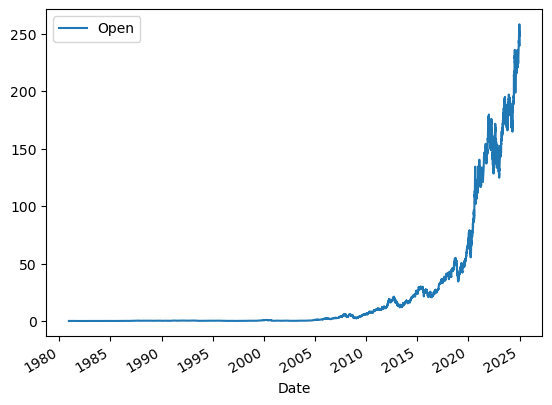

In [19]:
apple_share_price_data.plot(x="Date", y="Open")

# **Extracting Dividends**
Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [21]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
Name: Dividends, Length: 85, dtype: float64

We can plot the dividends overtime:

<Axes: xlabel='Date'>

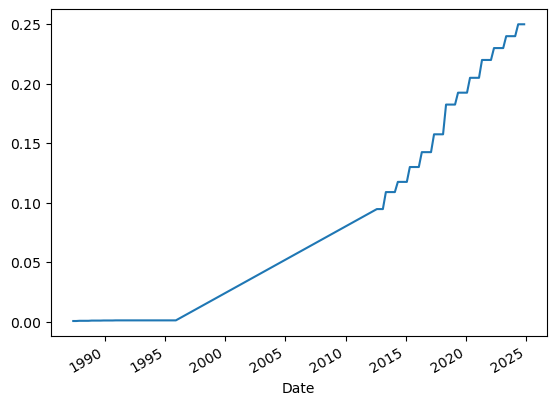

In [22]:
apple.dividends.plot()

# **Exercise**
Now using the Ticker module create an object for AMD (Advanced Micro Devices) with the ticker symbol is AMD called; name the object amd.



In [28]:
import yfinance as yf
amd = yf.Ticker("AMD")
print(amd.info)

{'address1': '2485 Augustine Drive', 'city': 'Santa Clara', 'state': 'CA', 'zip': '95054', 'country': 'United States', 'phone': '408 749 4000', 'website': 'https://www.amd.com', 'industry': 'Semiconductors', 'industryKey': 'semiconductors', 'industryDisp': 'Semiconductors', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. It operates through Data Center, Client, Gaming, and Embedded segments. The company offers x86 microprocessors and graphics processing units (GPUs) as an accelerated processing unit, chipsets, data center, and professional GPUs; and embedded processors, and semi-custom system-on-chip (SoC) products, microprocessor and SoC development services and technology, data processing unites, field programmable gate arrays (FPGA), and adaptive SoC products. It provides processors under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripp

In [30]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2025-01-13 16:00:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-01-13 16:00:19 (398 MB/s) - ‘amd.json’ saved [5838/5838]



In [31]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

Question 1 Use the key 'country' to find the country the stock belongs to, remember it as it will be a quiz question.



In [33]:
# Access the information dictionary and get the value for the key 'country'
country = amd.info.get('country', 'Country information not available')
print(f"The country the stock belongs to is: {country}")


The country the stock belongs to is: United States


Question 2 Use the key 'sector' to find the sector the stock belongs to, remember it as it will be a quiz question.

In [35]:
# Access the information dictionary and get the value for the key 'sector'
sector = amd.info.get('sector', 'Sector information not available')
print(f"The sector the stock belongs to is: {sector}")


The sector the stock belongs to is: Technology


Question 3 Obtain stock data for AMD using the history function, set the period to max. Find the Volume traded on the first day (first row).

In [36]:
# Get historical data for AMD stock with period set to 'max'
amd_history = amd.history(period="max")

# Display the first row of the historical data to find the volume traded
first_row = amd_history.head(1)  # Get the first row
first_day_volume = first_row['Volume'].values[0]  # Get the 'Volume' value
print(f"Volume traded on the first day: {first_day_volume}")


Volume traded on the first day: 219600
